In [1]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Алгоритмы

## План лекции
1. Алгоритм как совокупность операций
1. Массивы
1. Случайные числа

## Итеративный алгоритм

- операция повторяется многократно
- условие прекращения 

Вложенные итерации увеличивают число операций кратно.

## Жадный алгоритм

перебор всех вариантов по очереди от начала до конца.

<b class=tag>Greedy algorythm</b>

### Условия начала и конца

Вариант - очередь в реальном времени:
- заканчиваются данные, но потом снова появляются.


Потоки данных: входящий и выходящий
вход и выход
труба к трубе (pipeline)

<b class=tag>конвеер</b>

## FIFO, LIFO

![](fifolifo.png)

труба, стопка

### Конечный массив

есть начало, конец, размер.

### Виды массивов в Python
- list
- numpy.array
- pandas.DataFrame, pandas.Series

список - последовательность любых объектов, к которым можно обращаться перебором по-одному.

массив - N-мерный с однотипными объектами

табличка с данными: по строкам - отдельные наблюдения, по колонкам - характеристики.



### Линейная алгебра (ЛА)

*Матрица* $A_{m,n}$ - набор чисел в ячейках размером $m$ на $n$

Если $m==1$ или $n==1$, то такая матрица называется *вектор*.

Если $m==1$ **и** $n==1$, то такая матрица называется *скаляр* (скалярная величина, обычное единичное число).

Специальная операция - cкалярное произведение (перемножение матриц, dot-product)

Причины, почему этот раздел включен в курс для биологов:
- использование эффективных библиотек для матричных вычислений
- понимание обсуждения алгоритмов в среде математиков;
- расширение кругозора

## Математические условности

Переменные (вектора):  $x, y, z$ или $a, b, c, d$ или  $v,u$

Переменные (Матрицы):  $A,B$ или $U,V$ или $M$ или $X, Y, Z$ 

Размеры:  $n$, если две - $n,m$

Порядковые номера:  $i, j, k$  -  i-th, k-th [итый, житый, катый]

Углы: $\theta, \varphi, \alpha, \beta$

Маленькая-маленькая пороговая величина: $\varepsilon$ (эпсилон)

Коэффицинты:  $k, а$, например, $k_i a_{ij}$

Функции:  $f, \gamma$

Моменты распределения:  $\mu, \sigma, ...$

$\Game \Box   \varPhi \varPsi  
\varpi
\varPi \varXi $
$$ \heartsuit  $$
$\Box \maltese \Box \left(\left(\left( \bigodot \right)\right)\right) \Box\maltese\Box$

### Геометрическая интерпретация

Вектор (строчка матрицы) - это координаты конца стрелочки (arrow head), если начало вектора (хвостик, tail) при этом в нулевой точке. Но, если сместить вектор в пространстве, не меняя направления, то это тот же вектор, значит числа отражают разницу между концом и началом вдоль осей координат.

Размер вектора ( длина, расстояние между началом и концом) вычисляют по теореме Пифагора (для 2-мерного пространства L2-norm)

$$ L = |X|_p = \left(\sum{x_i^p}\right)^{1/p}, p=2$$

In [ ]:
a=array([.5,4,5,6])
norm(a,2), sqrt(3**2 + 4**2)

Матрицы можно только умножать.
Вместо деления - инверсия.

$$\frac{B}{A} = A^{-1}B $$

```py
dot(inv(A), B)
```

In [ ]:
inv(array([[10,0], [ 0, 4]]))

Умножение на диагональную матрицу - растяжение (stretching, scaling)

Умножение на ортонормальную (unitary) матрицу - вращение (rotating)

SVD-разложение: $U, \Sigma, V$ - вращение, растяжение, вращение

- для обратного вращения - транспонированная матрица вращения $U^T$

- для обратного растяжения - инвертированная матрица весов $\Sigma^{-1}$

$X$ - матрица размером $N$ x $K$: $N$ наблюдений и $K$ признаков (dimensions).

$X$ может быть разложена на:

$U\Sigma V^T = \frac {1} {\sqrt{N-1}}X$, где $V^T$ и $U$ - матрицы вращения, а $\Sigma$ - растяжения.

$C_X = \frac{1}{N-1}X^TX = R C_Y R^T = R \Sigma^2 R$ (ковариционная матрица)

$M_X = \frac{1}{N-1}XX^T = U \Sigma^2 U^T$ (корреляционная матрица)

где R - сингулярные векторы (eigenvectors, principal components), диагональные значения $C_Y$ определяют количество вариации, содержащейся в каждом компоненте.

$R=V=\frac{1}{\sqrt{N-1}} X^T U \Sigma^{-1}$

<img src='PCA_steps.png' width=600>

**3 способа выделения главных компонент (PCA)**

- SVD исходной матрицы $X$
- сингулярное разложение (eigenvalue decomposition) ковариционной матрицы $C_X$
- сингулярное разложение корреляционной матрицы $M_X$

### Косинусное расстояние

Между  двумя  векторами  образуется  угол  и 
значение  косинуса  этого  угла  –  это 
нормализованное  скалярное  произведение: 

$$cos(\theta)=\frac{a*b}{||a|| ||b||}=\frac{\sum_{i=1}^n a_i * b_i}{\sqrt{\sum_{i=1}^n a_i^2} * \sqrt{\sum_{i=1}^n a_i^2}} $$

<!--![](cos_formula.png)-->

правую часть можно реализовать через циклы,
левую - через векторные операции.

<img src=cosine.png width=90%>

In [2]:
a1 = array([0,0,1,1,1]);
a2 = array([1,0,0,1,1]);
dot(a1,a2)

2

Согласование размерностей

![](numpy_broadcasting.png)

Согласование размерностей

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

([image source](http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html))

**Broadcasting rules:**

1. If the two arrays differ in their number of dimensions, the shape of the array with fewer dimensions is *padded* with ones on its leading (left) side.

2. If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is *stretched* to match the other shape.

3. If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

### Интервалы

- открытые
- закрытые
- полуоткрытые

полуоткрытые используются при индексации массивов в Python

### Индексация массивов полуоткрытая

- по-умолчанию от 0
- разность конца и начала = размеру подмассива
- логичное определение пустых интервалов `v[0:0]`


### Визуализация матриц - изображение

Двоичные операции с массивами (bitwise)

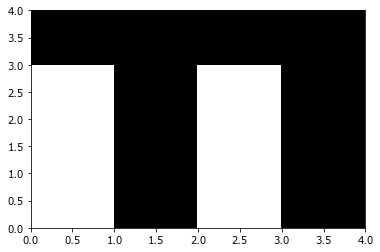

In [15]:
x = np.arange(16).reshape((4, 4))
pcolor((x < 12) & (x % 2 == 0), cmap='gray');

### Индексирование по нескольким измерениям


In [16]:
x[(0, 1), (1, 0)]

array([1, 4])

In [17]:
x[range(4), range(4)]

array([ 0,  5, 10, 15])

In [18]:
x.diagonal()

array([ 0,  5, 10, 15])

In [21]:
x[range(4), range(4)] = 100
x

array([[100,   1,   2,   3],
       [  4, 100,   6,   7],
       [  8,   9, 100,  11],
       [ 12,  13,  14, 100]])

In [19]:
i2=vstack([arange(3),arange(3)-2])
i2

array([[ 0,  1,  2],
       [-2, -1,  0]])

In [20]:
x[i2]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [ 0,  1,  2,  3]]])

### Генерация паттернов

In [3]:
a=array([1,2,3])
b=array([[1,0],[0,1]])
kron(a,b)

array([[1, 0, 2, 0, 3, 0],
       [0, 1, 0, 2, 0, 3]])

pcolor(_); colorbar();

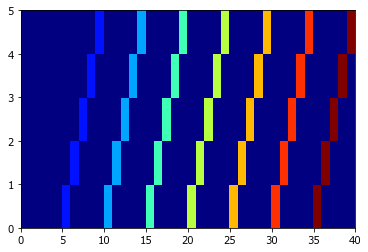

In [8]:
a=arange(8)
b=eye(5)
pcolor(kron(a,b), cmap='jet');

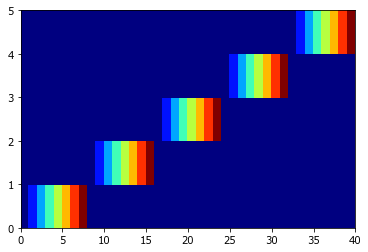

In [10]:
pcolor(kron(b,a), cmap='jet');

### Случайное перемешивание

In [11]:
i = np.arange(10)
np.random.shuffle(i)
i

array([0, 2, 8, 1, 5, 4, 9, 6, 3, 7])

# EM-алгоритм

На каждой итерации проводится два шага:

### E - evalution
Оценка текущего состояния

### M - maximisation 
Максимизация параметров. Т.е. "подгонка" модели под текущую выборку объектов. Например, путем минимизации ошибки.

![](emalg.png) 
 
Иллюстрация применения ЕМ-алгоритма для разделения смеси нормальных распределений
с двумя компонентами. На рис. а показана исходная выборка и начальное приближение для двух
компонент. На рис. b показан результат Е шага. При этом цвета объектов соответствуют значениям
γ nk . На рис. c-f показаны результаты вычислений после 1, 2, 5 и 20 итераций.

Варианты ЕМ-алгоритма:
- K-means
- Фильтр Кальмана
- Алгоритмы оптимизации

### Оценка текущего состояния

Требования:
- одно число - сумма отклонений
- предел при полном совпадении - 0

Mетод наименьших квадратов (введен в практику Гауссом)              + регуляризация

<b class="tag">RMSE</b>

### Приведение к нахождению минимума

- функция потерь (loss function)
- минимизация 

если потери = 0, то идеальное решение, иначе оптимальное.

Алгоритмы

Жесткие | Нежесткие
-|-
однозначная траектория | приблизительная траектория
перебор всех вариантов | неполный случайный выбор вариантов
скорость предопределена | скорость в пределах от и до
решение гарантировано | лучше усреднить несколько проходов

## Динамическое программирование

Подход к решению задач, при котором есть перекрытие между подзадачами и исходной задачей, т.е. они замыкаются друг на друга (рекурсия). Процесс решения включает этапы:
1. Выделение фрагментов задачи.
2. Разбор примитивных случаев с простыми решениями (с конца).
3. Запоминание вариантов решений в таблицу или задание порядка пересчета.
4. Подбор пошаговых решений из таблицы или переформулирование сложной задачи в виде рекурсивной последовательности более простых подзадач.

## Бионические алгоритмы

Изначально механистические, которые часто "заходят в тупик" в сложных ситуациях. Поиск новых алгоритмов черпает вдохновение в живых системах:

<b class=tag>biologically plausible</b>

### Рой пчел (Artificial bee colony algorithm)

![](bees_anim.gif)

Сначала из улея вылетают в случайно направлении какое-то количество пчел-разведчиков, которые пытаются отыскать участки, где есть нектар. Через какое-то время пчелы возвращаются в улей и особым образом сообщают остальным где и сколько они нашли нектара.
После этого на найденные участки отправляются другие пчелы, причем чем больше на данном участке предполагается найти нектара, тем больше пчел летит в этом направлении. А разведчики опять улетают искать другие участки, после чего процесс повторяется. 

### Иммунный ответ

- данные = антигены
- популяция антител эволюционирует для наилучшего распознования

![](Iris_Dim_Pairs.jpg)

<b class=tag>VALIS</b> <b class=tag>AIRS</b> <b class=tag>CLONALG</b>

### +++

[Почему индексация от 0](http://gestaltrevision.be/wiki/python/zerobased)

#### Python
[Whirlwind Tour Of Python](http://nbviewer.jupyter.org/github/jakevdp/WhirlwindTourOfPython/blob/master/00-Introduction.ipynb)

[Python Data Science Handbook](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb)

Reference Book: [Think Python: How to Think Like a Computer Scientist](http://greenteapress.com/thinkpython/html/index.html)

[Jupyter ](http://nbviewer.jupyter.org/github/jupyter/ngcm-tutorial/blob/master/Index.ipynb)


https://python-packaging.readthedocs.io/en/latest/